In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize  as opt
import scipy.ndimage as ndi
import scipy.signal as sig
import scipy.integrate as integ
import scipy.interpolate as inter
from scipy.special import erf

In [4]:
datas = ["BP","IP","OP"]
ranges = [range(1,4), range(1,9), range(1,9)]
for i,p in enumerate(datas):
    for o in ranges[i]:
        name = p +"_" + str(o) + "_dec"
        xls = pd.ExcelFile("Data(txt)/" + name + ".xlsx")
        df12 = pd.read_excel(xls, sheet_name="Sheet1")
        exec("{}_t = df12['t (s)'].values".format(name))
        exec("{}_u1 = df12['U1(V)'].values".format(name))
        exec("{}_u2 = df12['U2(V)'].values".format(name))


Variables not found for p=BP, o=1
Variables not found for p=BP, o=2
Variables not found for p=BP, o=3
Variables not found for p=IP, o=1
Variables not found for p=IP, o=2
Variables not found for p=IP, o=3
Variables not found for p=IP, o=4
Variables not found for p=IP, o=5
Variables not found for p=IP, o=6
Variables not found for p=IP, o=7
Variables not found for p=IP, o=8
Variables not found for p=OP, o=1
Variables not found for p=OP, o=2
Variables not found for p=OP, o=3
Variables not found for p=OP, o=4
Variables not found for p=OP, o=5
Variables not found for p=OP, o=6
Variables not found for p=OP, o=7
Variables not found for p=OP, o=8


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

datas = ["BP", "IP", "OP"]
ranges = [range(1,4), range(1,9), range(1,9)]

# Create a nested dictionary to store all your data
data_dict = {}

for i, p in enumerate(datas):
    for o in ranges[i]:
        name = f"{p}_{o}_dec"
        file_path = f"Data(txt)/{name}.xlsx"
        
        try:
            # Load the Excel file
            xls = pd.ExcelFile(file_path)
            df12 = pd.read_excel(xls, sheet_name="Sheet1")
            
            # Store data in dictionary instead of using exec()
            data_dict[name] = {
                'time': df12['t (s)'].values,
                'u1': df12['U1(V)'].values,
                'u2': df12['U2(V)'].values,
                'dataframe': df12  # Optional: store the whole dataframe if needed
            }
            
            print(f"Successfully loaded: {name}")
            
        except FileNotFoundError:
            print(f"Warning: File not found: {file_path}")
        except KeyError as e:
            print(f"Warning: Column {e} not found in {name}.xlsx")
        except Exception as e:
            print(f"Error loading {name}: {e}")

Successfully loaded: BP_1_dec
Successfully loaded: BP_2_dec
Successfully loaded: BP_3_dec
Successfully loaded: IP_1_dec
Successfully loaded: IP_2_dec
Successfully loaded: IP_3_dec
Successfully loaded: IP_4_dec
Successfully loaded: IP_5_dec
Successfully loaded: IP_6_dec
Successfully loaded: IP_7_dec
Successfully loaded: IP_8_dec
Successfully loaded: OP_1_dec
Successfully loaded: OP_2_dec
Successfully loaded: OP_3_dec
Successfully loaded: OP_4_dec
Successfully loaded: OP_5_dec
Successfully loaded: OP_6_dec
Successfully loaded: OP_7_dec
Successfully loaded: OP_8_dec


In [14]:
print(data_dict)

{}


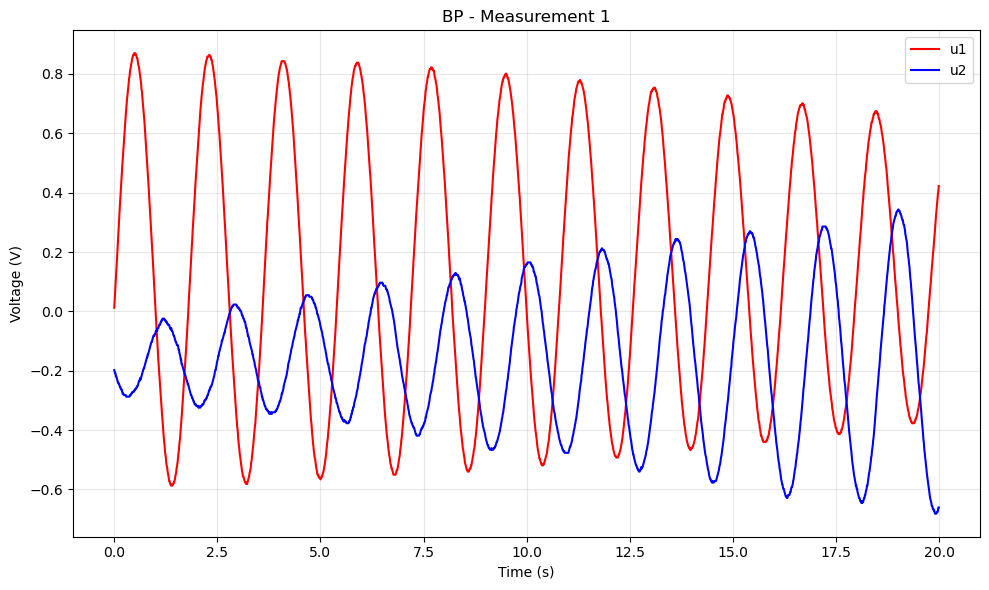

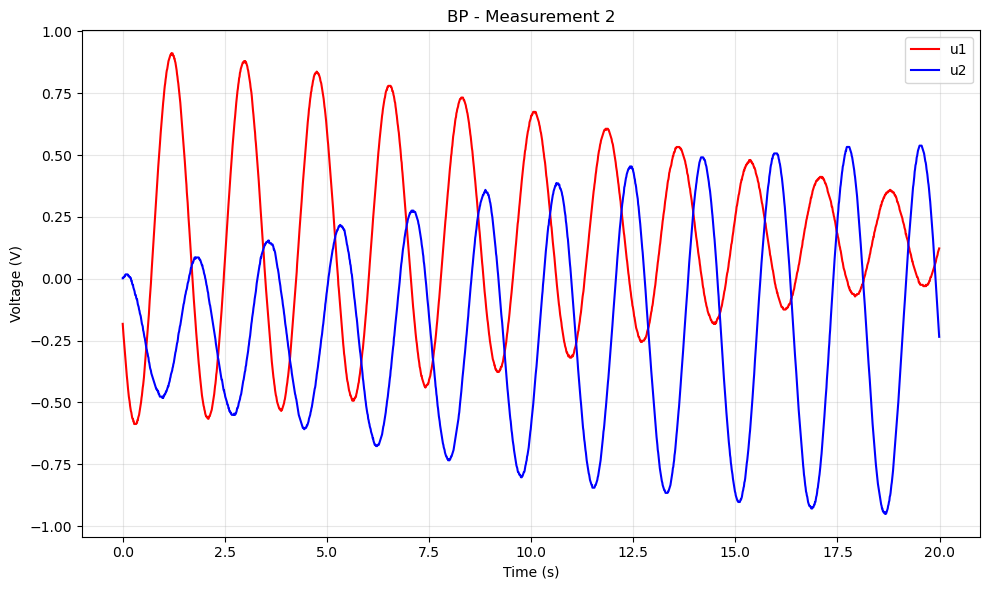

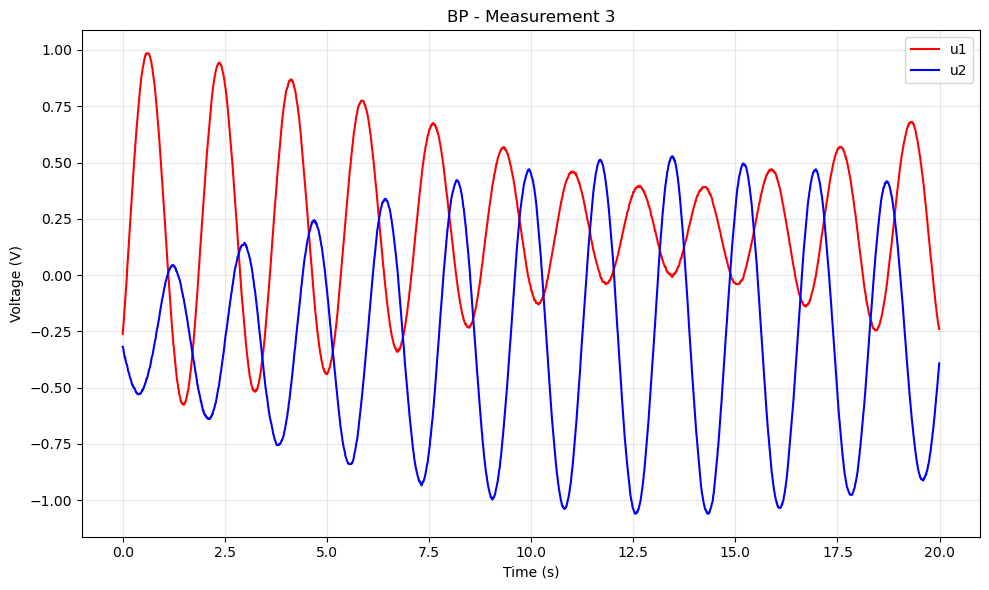

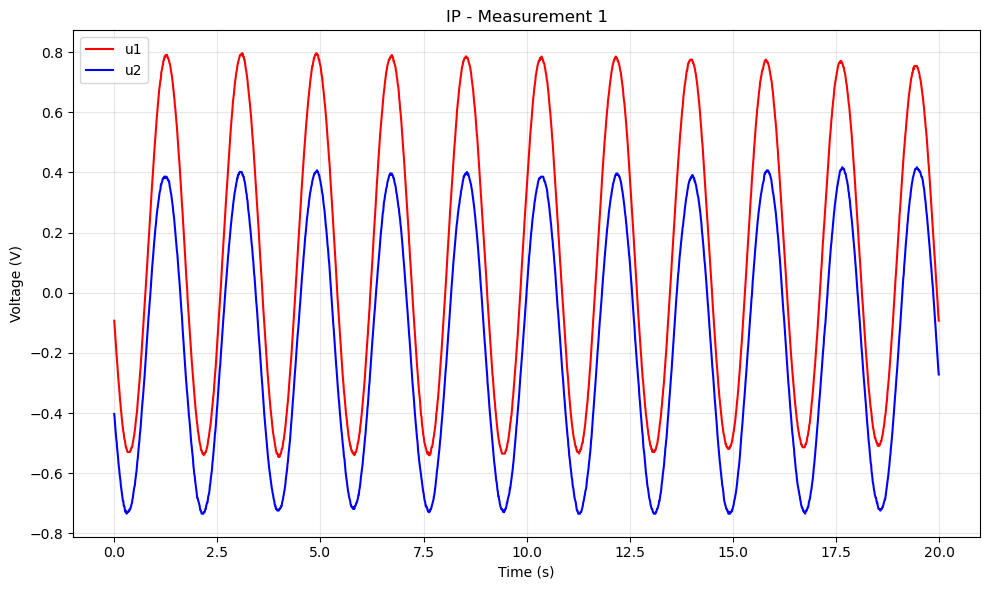

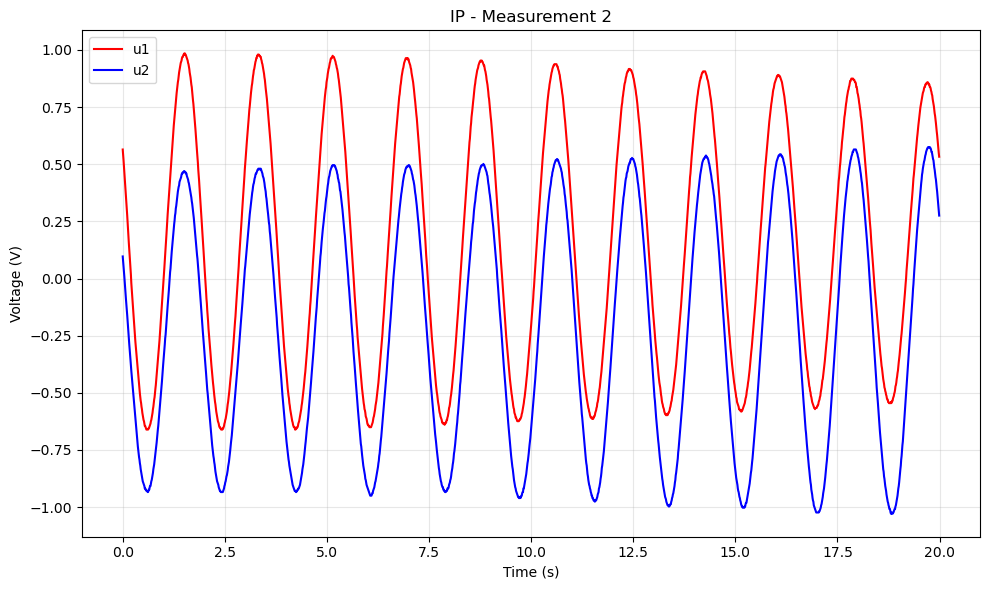

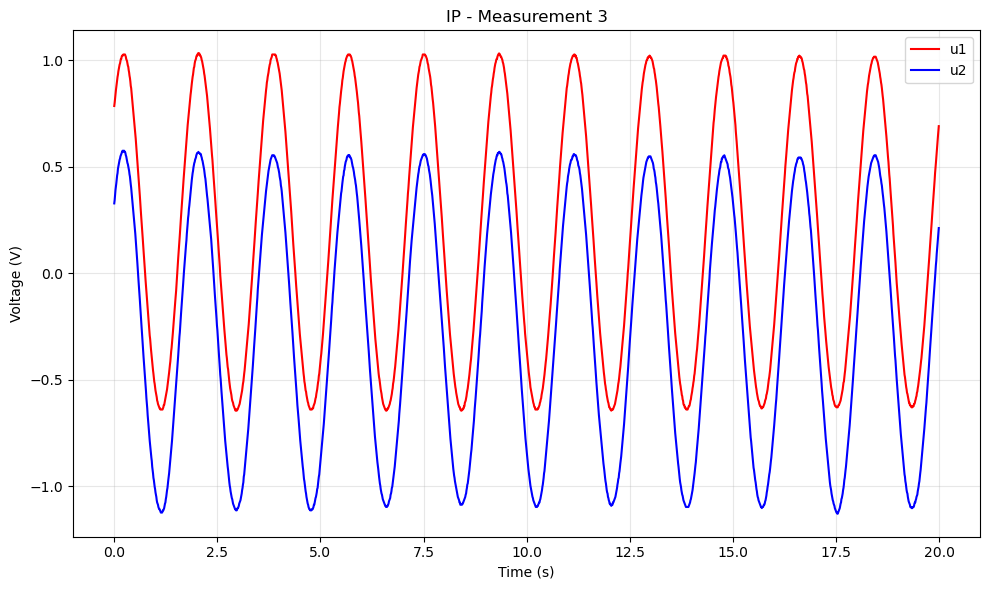

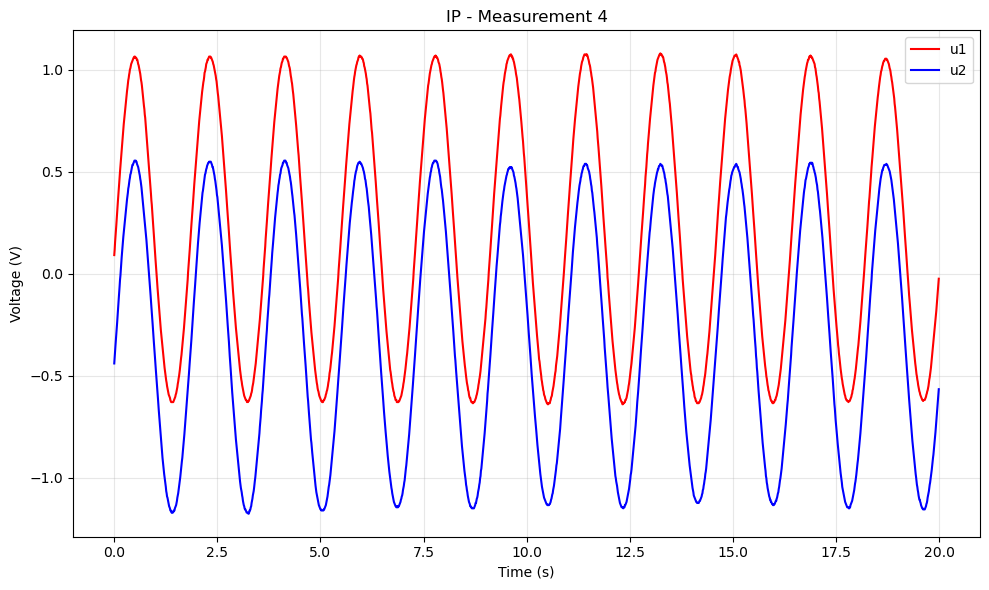

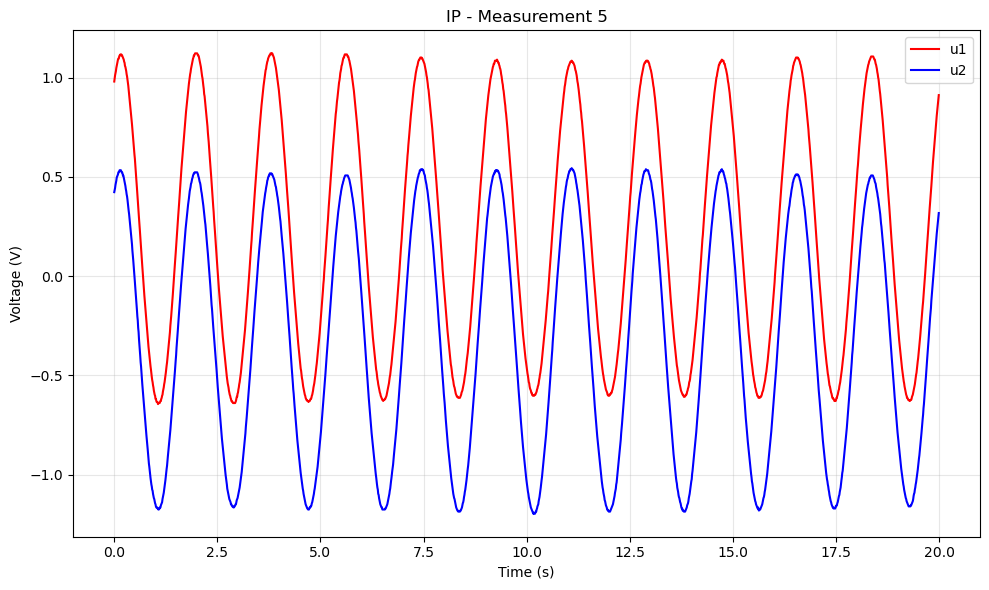

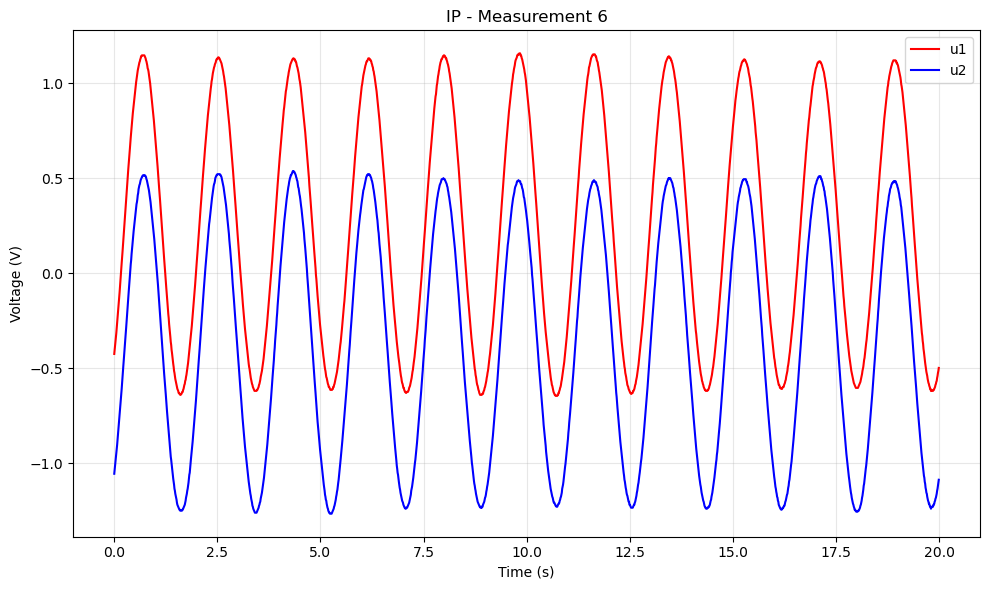

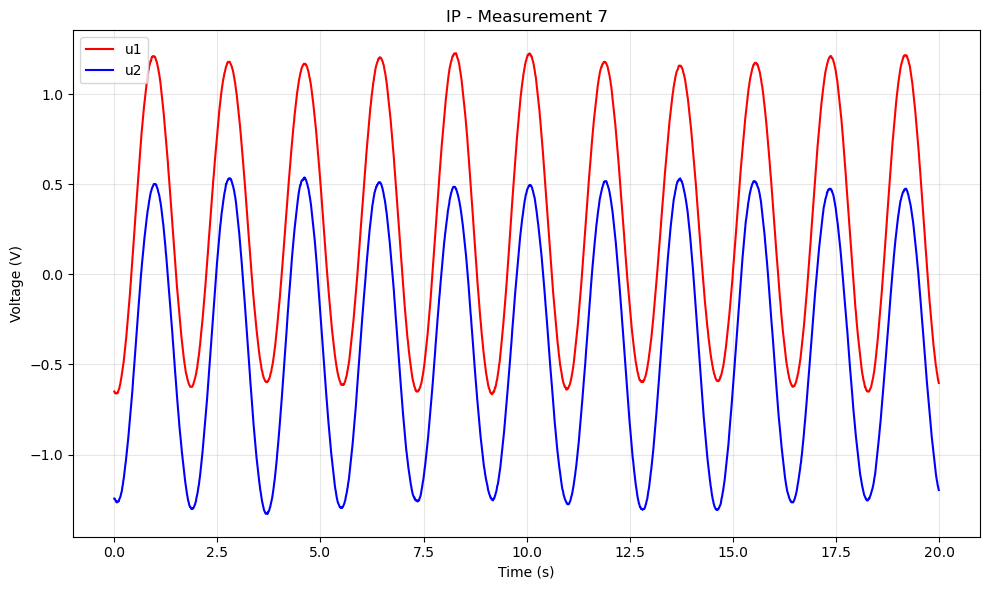

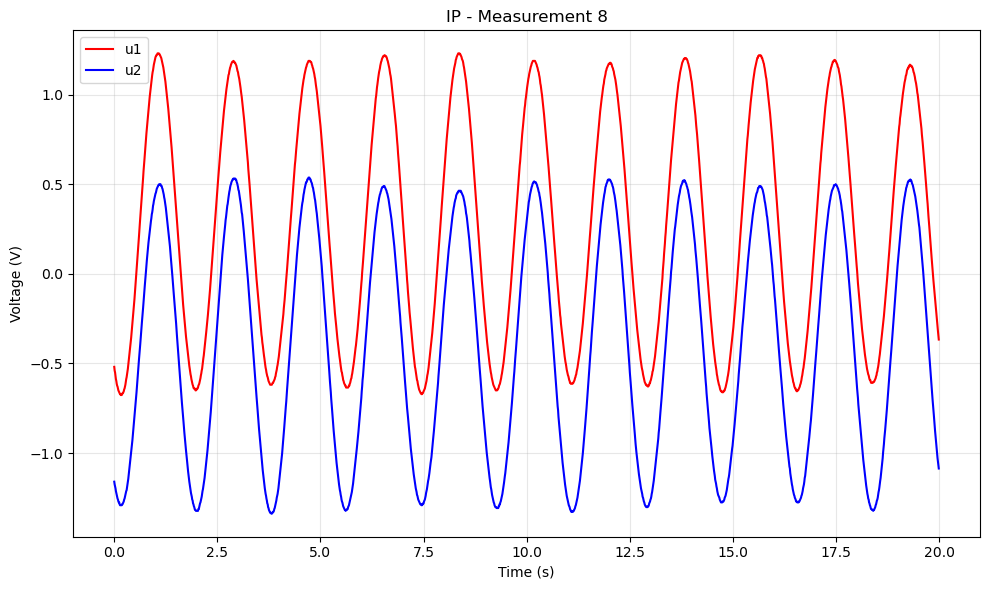

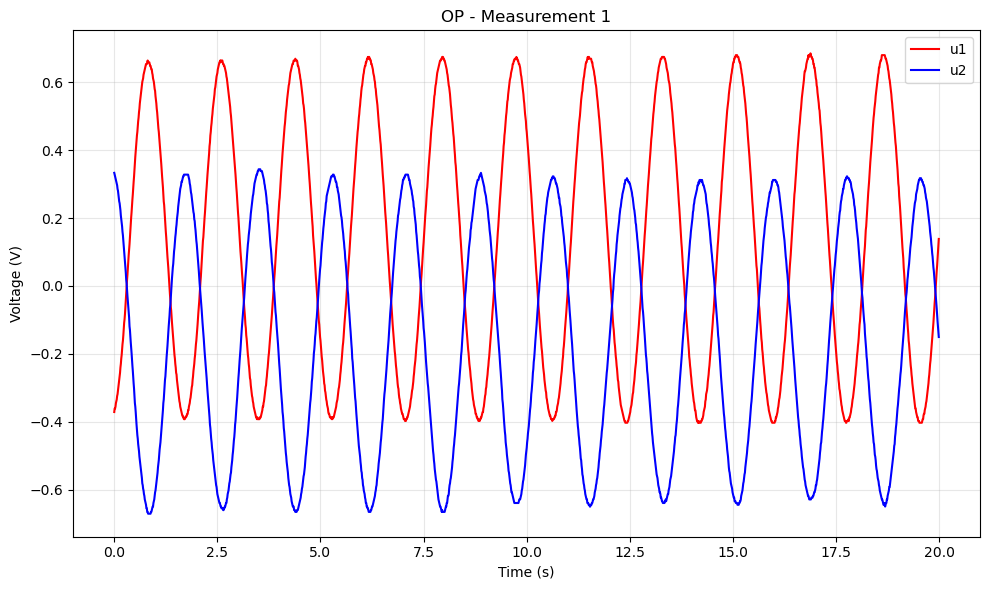

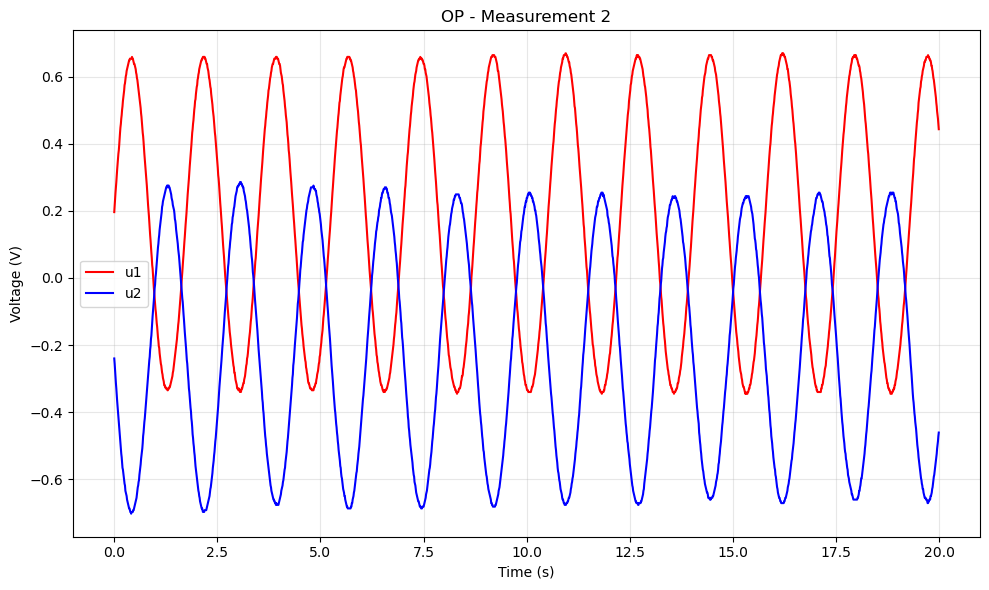

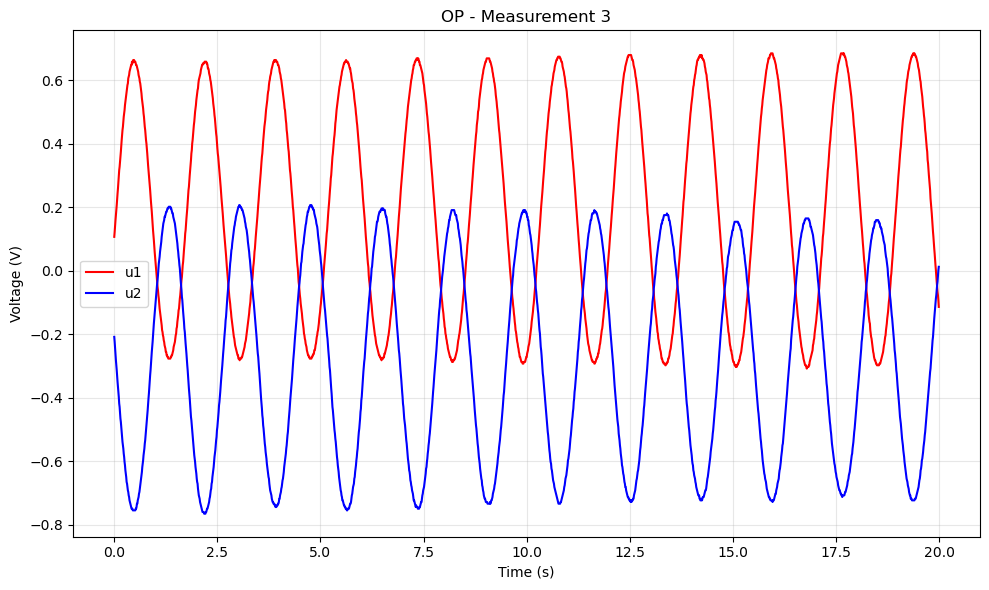

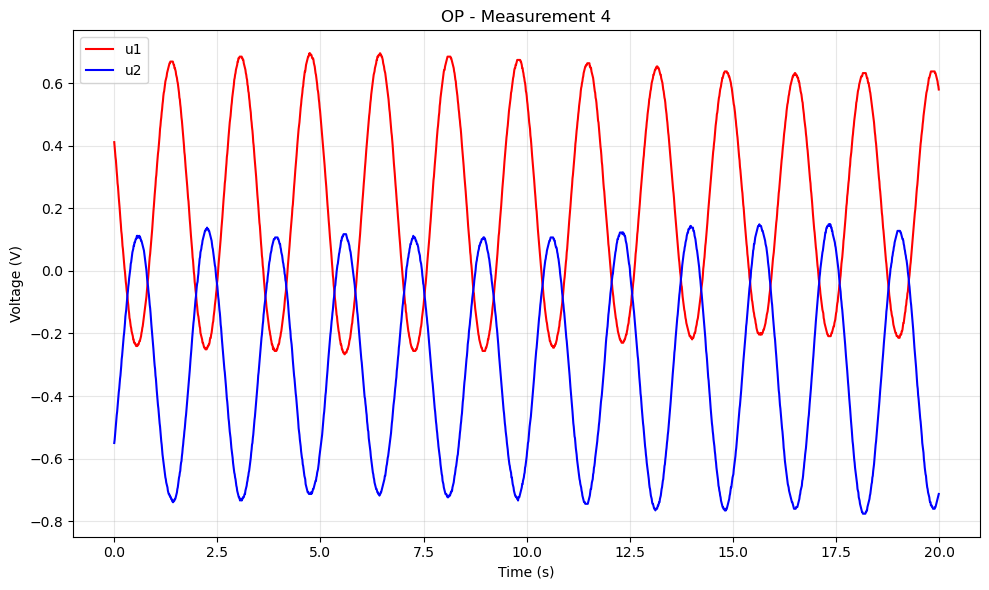

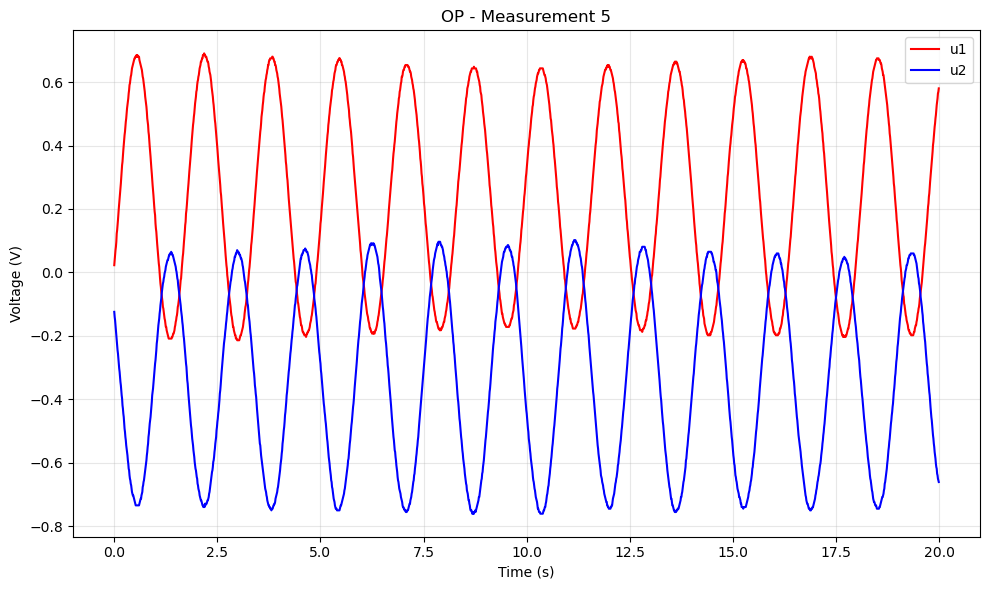

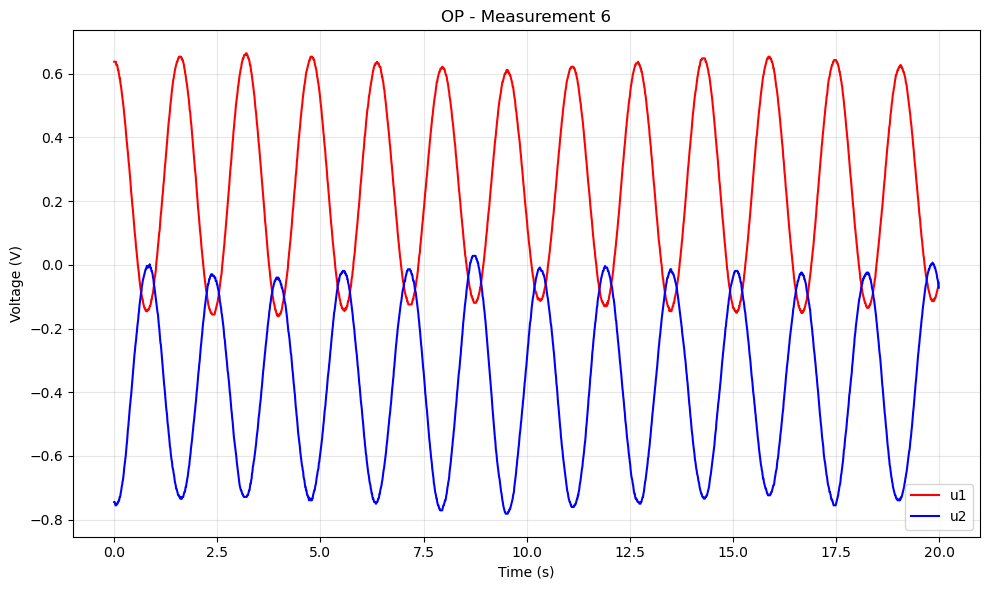

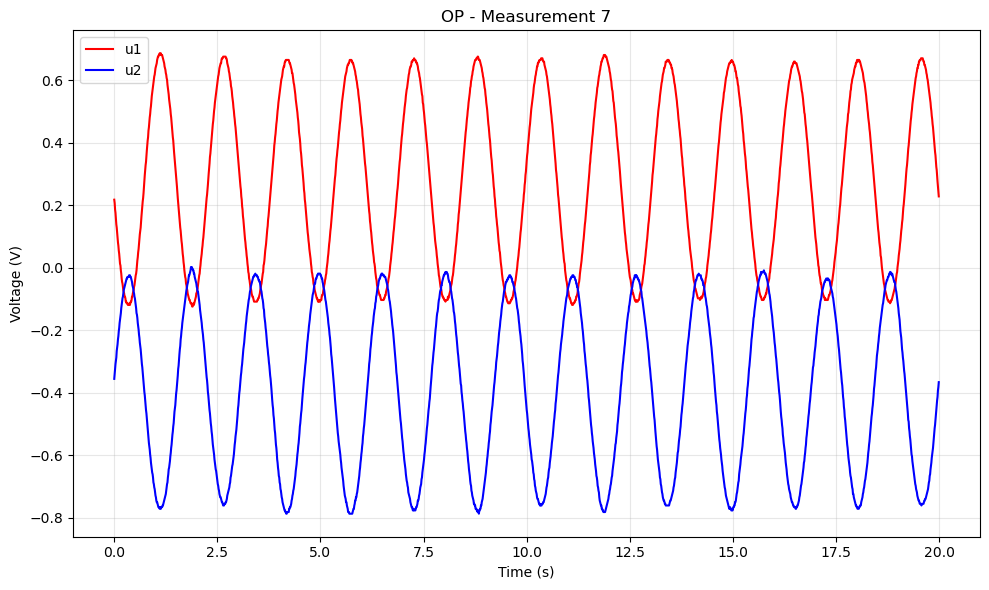

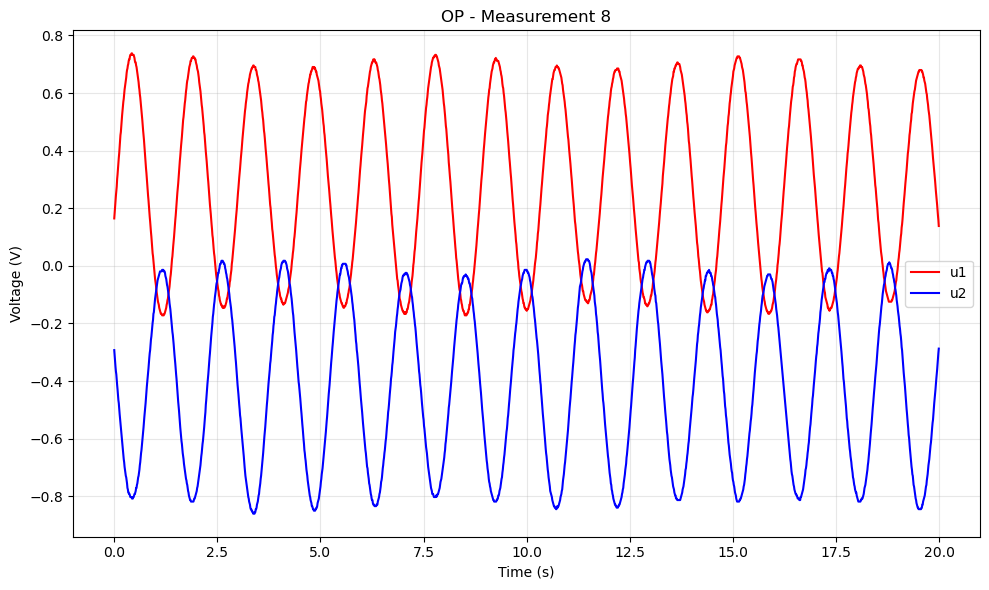

In [18]:
# Now plot using the dictionary
for i, p in enumerate(datas):
    for o in ranges[i]:
        name = f"{p}_{o}_dec"
        
        if name in data_dict:
            # Get data from dictionary
            data = data_dict[name]
            time = data['time']
            u1 = data['u1']
            u2 = data['u2']
            
            # Create plot
            plt.figure(figsize=(10, 6))
            plt.title(f"{p} - Measurement {o}")
            plt.ylabel("Voltage (V)")
            plt.xlabel("Time (s)")
            plt.grid(True, alpha=0.3)
            
            plt.plot(time, u1, color="red", label="u1")
            plt.plot(time, u2, color="blue", label="u2")
            plt.legend()
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"Data not available for {name}")

In [ ]:
for i,p in enumerate(datas):
    for o in ranges[i]:
        plt.title(f"TITLE")
        plt.ylabel("Voltage (V)")
        plt.xlabel("Time (s)")
        plt.grid(True,alpha=0.3)
        
        time = eval("{0}_{1}_t".format(p,o))
        u1 = eval("{0}_{1}_u1".format(p,o))
        u2 = eval("{0}_{1}_u2".format(p,o))
        plt.plot(time,u1,color="red")
        #plt.plot(time,u2,color="blue")
        plt.show()


SyntaxError: invalid syntax (1984417471.py, line 14)


Spinodal points:
  Local maximum: V = 0.003565 m³, P = 7.013 Pa
  Local minimum: V = 0.003447 m³, P = 6.977 Pa
6.994981445056424


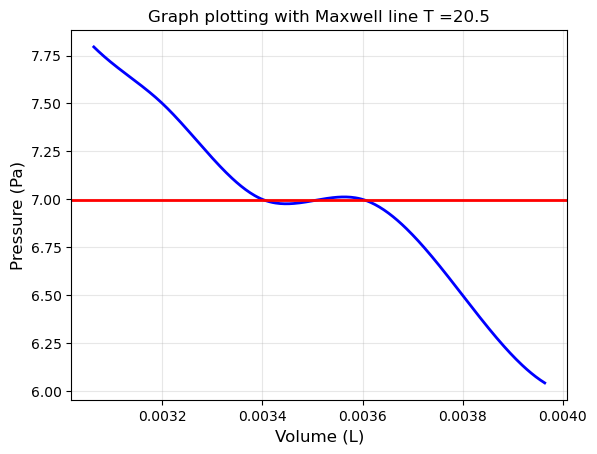


Spinodal points:
  Local maximum: V = 0.003793 m³, P = 7.000 Pa
  Local minimum: V = 0.003664 m³, P = 6.968 Pa
6.98412372220392


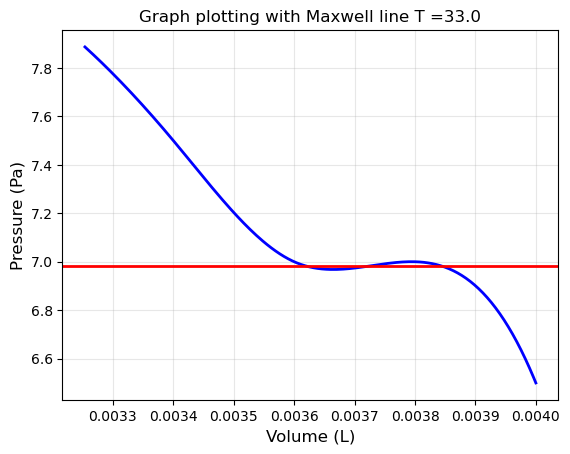


Spinodal points:
  Local maximum: V = 0.003800 m³, P = 7.000 Pa
  Local minimum: V = 0.003667 m³, P = 6.962 Pa
6.981196830504715


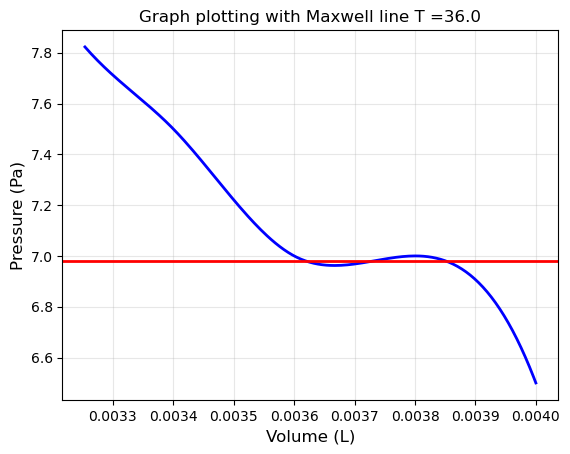

In [56]:

sheets = ["Sheet1","Sheet2","Sheet3","Sheet4","Sheet5","Sheet6","Sheet7","Sheet8"]
temperature = np.array([20.5,33,36,39,42,45,47,50])

datas = np.array([])
p_list = []
v_list = []

vapor_pressure = np.array([])
vapor_temperature = np.array([])

for i,p in enumerate(sheets):

    p_element = p_element_list[i]
    v_element = v_element_list[i]

    volume_fine = np.linspace(min(v_element), max(v_element), 1000)

    sorted_indices = np.argsort(v_element)
    volume = v_element[sorted_indices]
    pressure = p_element[sorted_indices]
    
    cs = inter.CubicSpline(volume, pressure)
    pressure_fine = cs(volume_fine)


    maxima_indices, _ = sig.find_peaks(pressure_fine)

    minima_indices, _ = sig.find_peaks(-pressure_fine)

    if len(maxima_indices) > 0 and len(minima_indices) > 0:

        v_max = volume_fine[maxima_indices[0]]
        p_max = pressure_fine[maxima_indices[0]]
        v_min = volume_fine[minima_indices[0]]
        p_min = pressure_fine[minima_indices[0]]
        
        print(f"\nSpinodal points:")
        print(f"  Local maximum: V = {v_max:.6f} m³, P = {p_max:.3f} Pa")
        print(f"  Local minimum: V = {v_min:.6f} m³, P = {p_min:.3f} Pa")
        

        def area_difference(P_m):
            """Calculate difference between areas above and below P_m"""

            crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]
            
            if len(crossings) < 3:
                return np.inf
                
            v1 = volume_fine[crossings[0]]  # Liquid temperature
            v2 = volume_fine[crossings[1]]  
            v3 = volume_fine[crossings[2]]  # Vapor temperature
            
            mask1 = (volume_fine >= v1) & (volume_fine <= v2)
            if np.sum(mask1) < 2:
                return np.inf
                
            v1_range = volume_fine[mask1]
            p1_range = pressure_fine[mask1]
            
            mask2 = (volume_fine >= v2) & (volume_fine <= v3)
            if np.sum(mask2) < 2:
                return np.inf
                
            v2_range = volume_fine[mask2]
            p2_range = pressure_fine[mask2]
            
            A1 = integ.simpson(p1_range - P_m, v1_range)
            A2 = integ.simpson(P_m - p2_range, v2_range)

            return abs(A1 - A2)
        
        bounds = (p_min, p_max)
        
        P_m_candidates = []
        area_diffs = []
        
        for P_start in np.linspace(p_min, p_max, 20):
            result = opt.minimize(area_difference, P_start, bounds=[bounds], method='L-BFGS-B')
            if result.success:
                P_m_candidates.append(result.x[0])
                area_diffs.append(result.fun)
        
        if P_m_candidates:
            best_idx = np.argmin(area_diffs)
            P_m = P_m_candidates[best_idx]
            
            crossings = np.where(np.diff(np.sign(pressure_fine - P_m)))[0]        
            if len(crossings) >= 3:
                v_liquid = volume_fine[crossings[0]]
                v_vapor = volume_fine[crossings[2]]
                
                v_zoom_min = v_liquid * 0.9
                v_zoom_max = v_vapor * 1.1
                zoom_mask = (volume_fine >= v_zoom_min) & (volume_fine <= v_zoom_max)
                
                plt.plot(volume_fine[zoom_mask], pressure_fine[zoom_mask], 'b-', linewidth=2)
                plt.axhline(y=P_m, color='red', linestyle='-', linewidth=2)
                print(P_m)
                vapor_pressure = np.append(vapor_pressure,P_m)
                vapor_temperature = np.append(vapor_temperature,temperature[i])
                

                
                """
                plt.scatter([v_liquid, v_max, v_min, v_vapor], 
                        [P_m, p_max, p_min, P_m], 
                        color=['green', 'orange', 'orange', 'green'], 
                        s=100, zorder=5)
                """
                
                plt.xlabel('Volume (L)', fontsize=12)
                plt.ylabel('Pressure (Pa)', fontsize=12)
                plt.title(f'Graph plotting with Maxwell line T ={temperature[i]}', fontsize=12)
                plt.grid(True, alpha=0.3)
                plt.show()

[ 6.96434254 -0.7502607 ]


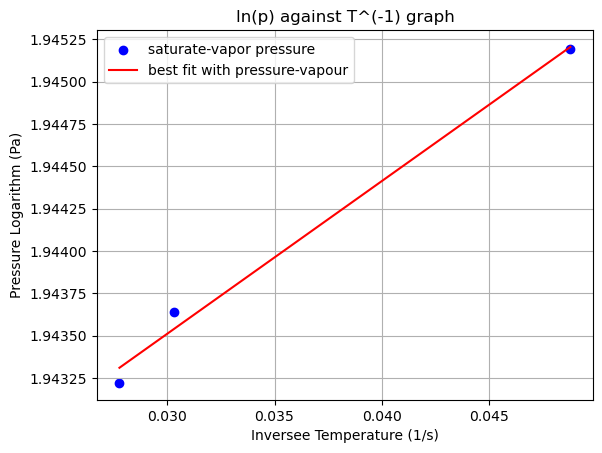

In [ ]:
def pressure_vapour(T,p_s0,Q):
    return np.log(p_s0) + (-Q*T/(R))

smooth_temp = np.linspace(1/vapor_temperature[0],1/vapor_temperature[-1],1000)

inverse_T = 1/vapor_temperature
ln_p = np.log(vapor_pressure)

#fit the line
popt, pcov = opt.curve_fit(pressure_vapour,inverse_T,ln_p)
pressure_fit = pressure_vapour(smooth_temp,*popt)
    

plt.title(f"ln(p) against T^(-1) graph")

plt.scatter(inverse_T,ln_p, label=r"saturate-vapor pressure", color='blue',)
#plt.scatter(vapor_temperature,vapor_pressure)
plt.plot(smooth_temp,pressure_fit,label="best fit with pressure-vapour",color="red")

print(popt)

plt.grid(True)
plt.xlabel("Inversee Temperature (1/s)")
plt.ylabel("Pressure Logarithm (Pa)")
plt.legend()
plt.show()